In [1]:
import sys
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append("/home/photon/code/Qfunction/")

In [3]:
import Qfunction as Q

In [4]:
cd "/home/photon/data/06-15-2015"

/home/photon/data/06-15-2015


In [5]:
ls

10-42-54_raw.npz  10-43-49_raw.npz


In [6]:
data_npz = np.load("10-43-49_raw.npz")
vacuum_npz = np.load("10-42-54_raw.npz")
data = data_npz['dataOut']
vacuum = vacuum_npz['dataOut']
ncount = data_npz['ncount']

In [7]:
n = np.sqrt(ncount)
print "Std dev. of LO: ", n.std()/n.mean()
print "Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean()

Std dev. of LO:  0.00263544155952
Peak to Peak as fraction of LO mean:  0.0171822063418


In [8]:
Kp_vac = np.average(vacuum,axis=(1,2))

In [9]:
scaled_vc = np.sqrt(2.0/ncount)*(data - Kp_vac.reshape(600,1,1))

In [10]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

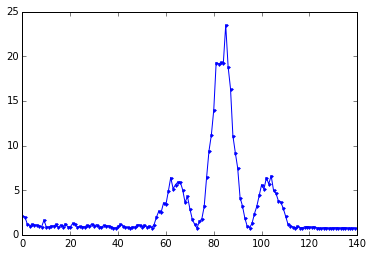

In [11]:
plot(avg_n_quick[120:260],".-")  # look at the modes with their amplitudes

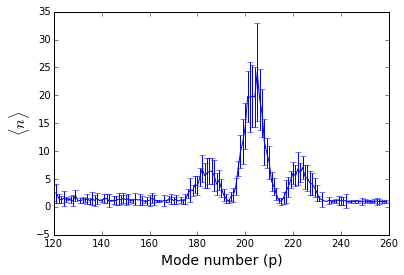

In [13]:
std_dev_n = np.zeros(300)
avg_n = np.zeros(300)
for i in range(120,260):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)

errorbar(arange(120,260,1),avg_n[120:260],yerr=std_dev_n[120:260])
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

In [14]:
mode = 204
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = np.abs(scaled_vc[mode,:,:]).std(axis=0)

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

(0, 1.2)

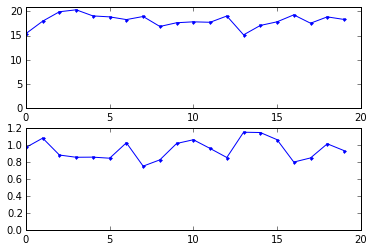

In [15]:
subplot(211)
plot(check_n,".-")
ylim(ymin=0)
subplot(212)
plot(check_var,".-")
ylim(ymin=0)

Now pick the best section of the rounds: 10:40 (not sure if this matters much, but worth checking)

In [16]:
output = scaled_vc[mode,:,0:20].flatten('F')

In [17]:
x = np.real(output)
y = np.imag(output)

In [18]:
0.5*(np.abs(output).mean())**2  # the easy calculation

19.228074713605888

In [19]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

19.69736177921493

In [20]:
X,Y,Z = Q.kernel_estimate(x,y)

KDE kernel factor:  0.316227766017


In [22]:
print "<n_Q> = ",Q.avg_n(X,Y,Z)  # the calculated from Q function
print "<n_Q-raw> = ", Q.avg_n_raw(x,y)
print "StDev n = ", Q.std_n(X,Y,Z)
print "StDev n raw = ", Q.std_n_raw(x,y)

<n_Q> =  669.43675499
<n_Q-raw> =  19.6973617792
StDev n =  nan
StDev n raw =  5.38716018913


In [23]:
print "Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100)
print "Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100)

Kernel estimate noise as percent: nan
Raw quadratures noise as percent: 21.38


KDE kernel factor:  0.316227766017


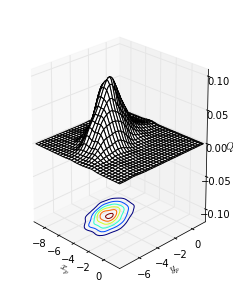

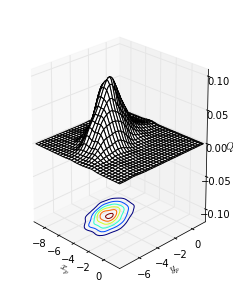

In [24]:
Q.qsurf(x,y)  # good looking figures though!

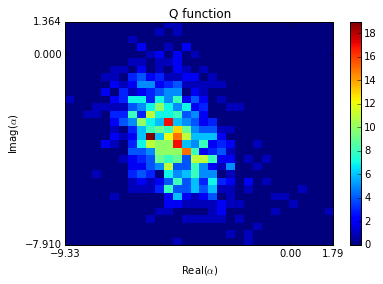

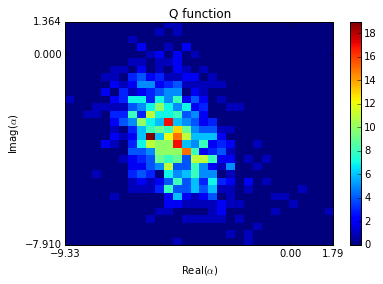

In [25]:
Q.qfuncimage(output)